In [3]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt

In [19]:
N = 6805
X = pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_mice.csv")
Y = X["class"]
Y = pd.DataFrame(Y)
X = X.drop("class", axis=1)
X.shape

(6822, 31)

In [20]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train_sc.reset_index(drop=True, inplace=True)
X_test_sc.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
Phi_train = X_train_sc
Phi_test = X_test_sc

In [23]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(Phi_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [11]:
def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [[ 2.460e-02 -4.297e-03 -3.680e-03  1.501e-03 -3.655e-04 -9.845e-03
   3.415e-03  7.843e-04 -2.817e-02  1.165e-02  8.939e-03 -7.944e-05
   4.592e-04  4.375e-03  9.350e-03  1.967e-02 -5.947e-03  2.600e-03
   6.599e-06  4.587e-03 -4.429e-06  6.480e-03 -4.392e-04  1.226e-02
   7.112e-03 -1.650e-03 -2.652e-03 -4.718e-03  2.167e-03  2.372e-04
   5.617e-01]]


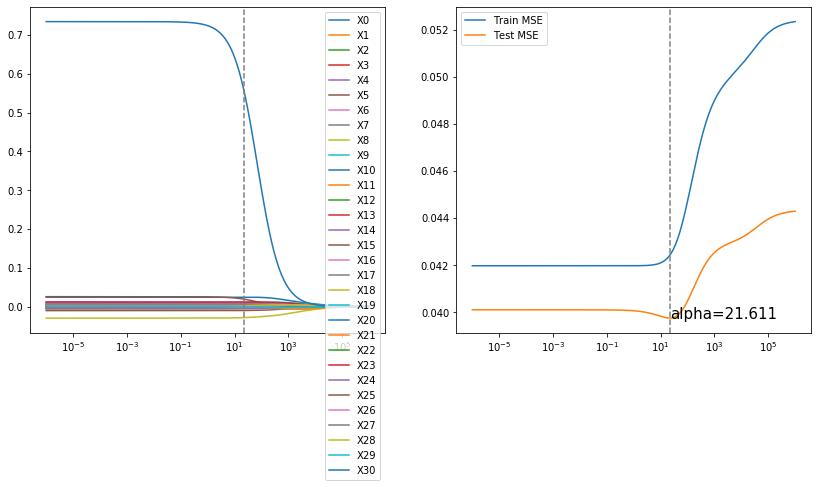

In [25]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

In [13]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

In [26]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

Weight: [ 2.043e-02 -0.000e+00 -0.000e+00  0.000e+00 -0.000e+00 -0.000e+00
 -0.000e+00  0.000e+00 -1.853e-02  9.251e-03  2.707e-04 -0.000e+00
  0.000e+00  0.000e+00  0.000e+00  1.109e-03 -0.000e+00 -0.000e+00
 -0.000e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e+00  8.553e-03
  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00
  4.694e-01]


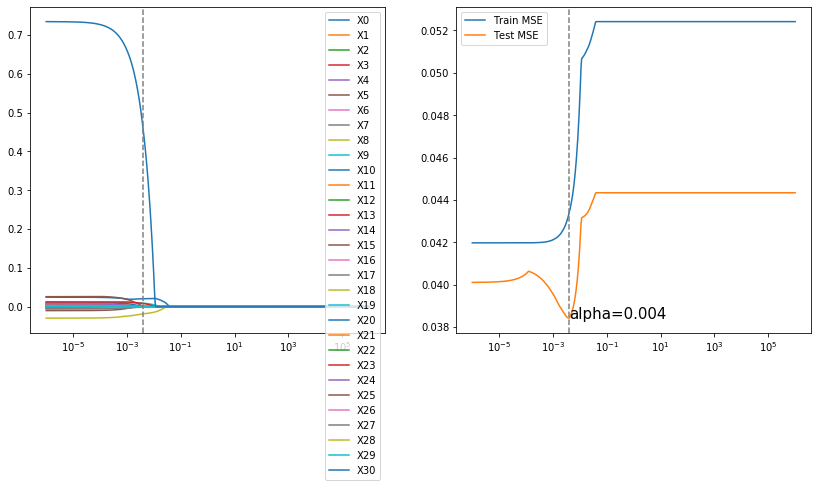

In [27]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

In [4]:
datamice= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_mice.csv")
datamedian= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_median.csv")
dataknn= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_knn.csv")

In [96]:
datamice.columns

Index(['Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr9', 'Attr10',
       'Attr13', 'Attr19', 'Attr21', 'Attr22', 'Attr29', 'Attr30', 'Attr31',
       'Attr33', 'Attr39', 'Attr41', 'Attr43', 'Attr47', 'Attr52', 'Attr53',
       'Attr55', 'Attr59', 'Attr61', 'Attr64', 'Attr65', 'Attr66', 'Attr67',
       'Attr68', 'Attr69', 'Attr70', 'class'],
      dtype='object')

In [33]:
X.columns[[0, 8, 9,10,15,23,30]]

Index(['Attr2', 'Attr19', 'Attr21', 'Attr22', 'Attr39', 'Attr61', 'Attr70'], dtype='object')

In [5]:
Lasso_coef_mice = [1.555e-02, -9.505e-03, -0.000e+00,  3.335e-04, -6.322e-05, -8.352e-03,
  0.000e+00,  1.330e-02, -2.560e-02,  1.154e-02,  4.082e-03,  2.352e-03,
  2.484e-03,  0.000e+00,  5.564e-03,  1.208e-02, -6.783e-05,  5.208e-04,
  0.000e+00,  2.579e-03, -0.000e+00,  3.283e-03,  2.756e-03,  8.344e-03,
  4.747e-03, -9.828e-04, -2.314e-03, -9.738e-03,  8.975e-04, -1.859e-03,
  6.116e-01]
cols = datamice.columns[:-1]

In [6]:
len(Lasso_coef_mice)

31

In [7]:
df = pd.DataFrame({"X" :cols, "coef": Lasso_coef_mice})
df = df.sort_values(['coef'], ascending=[False])

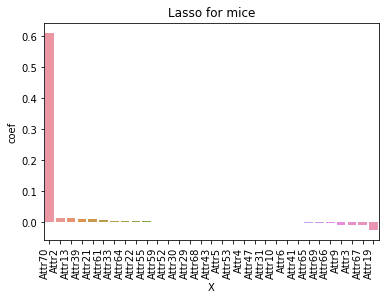

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

lasso = sns.barplot(
    data= df,
    x = "X",
    y = "coef"
)
lasso.set_xticklabels(lasso.get_xticklabels(), rotation=90, horizontalalignment='right')
lasso.set_title("Lasso for mice")
plt.show()

In [99]:
Lasso_coef_knn = [ -9.076e-03, -5.589e-03, -4.729e-04,  0.000e+00, -3.550e-03, -3.455e-03,
 -1.767e-03,  0.000e+00, -1.100e-02, -1.590e-02,  1.234e-02, -0.000e+00,
  7.006e-04, -2.213e-03, -0.000e+00,  2.380e-04,  2.256e-04, -0.000e+00,
  1.807e-03,  9.418e-04, -7.095e-05, -0.000e+00, -0.000e+00,  0.000e+00,
  0.000e+00,  4.859e-03,  3.089e-03,  7.583e-04,  3.134e-04,  9.345e-04,
  3.727e-04,  4.455e-04,  1.216e-02, -0.000e+00,  4.503e-03,  1.275e-03,
  0.000e+00,  6.140e-01]
cols = dataknn.columns[:-1]

In [100]:
df = pd.DataFrame({"X" :cols, "coef": Lasso_coef_knn})
df = df.sort_values(['coef'], ascending=[False])

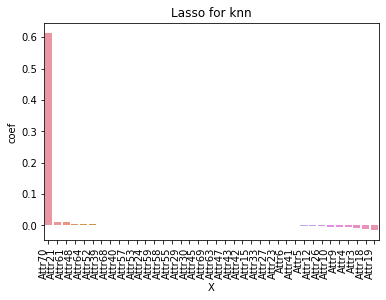

In [101]:
lasso = sns.barplot(
    data= df,
    x = "X",
    y = "coef"
)
lasso.set_xticklabels(lasso.get_xticklabels(), rotation=90, horizontalalignment='right')
lasso.set_title("Lasso for knn")
plt.show()

In [102]:
Lasso_coef_median = [ -1.477e-02, 1.563e-02, -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00,
  0.000e+00, -0.000e+00, -5.819e-04, -0.000e+00, -0.000e+00, -1.380e-02,
  1.107e-02, -0.000e+00,  0.000e+00, -0.000e+00, -2.184e-04, -0.000e+00,
 -0.000e+00,  0.000e+00,  0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
  0.000e+00, -0.000e+00, -0.000e+00,  5.947e-03,  0.000e+00,  0.000e+00,
  0.000e+00,  0.000e+00,  9.066e-03,  6.746e-04, -0.000e+00, -2.860e-04,
 -0.000e+00,  0.000e+00,  0.000e+00,  4.758e-01]
cols = datamedian.columns[:-1]

In [103]:
df = pd.DataFrame({"X" :cols, "coef": Lasso_coef_median})
df = df.sort_values(['coef'], ascending=[False])

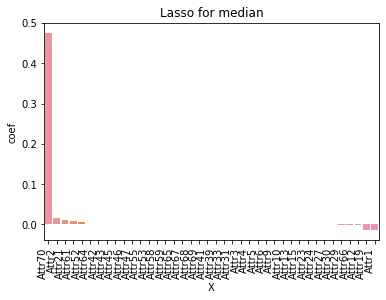

In [104]:
lasso = sns.barplot(
    data= df,
    x = "X",
    y = "coef"
)
lasso.set_xticklabels(lasso.get_xticklabels(), rotation=90, horizontalalignment='right')
lasso.set_title("Lasso for median")
plt.show()